In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

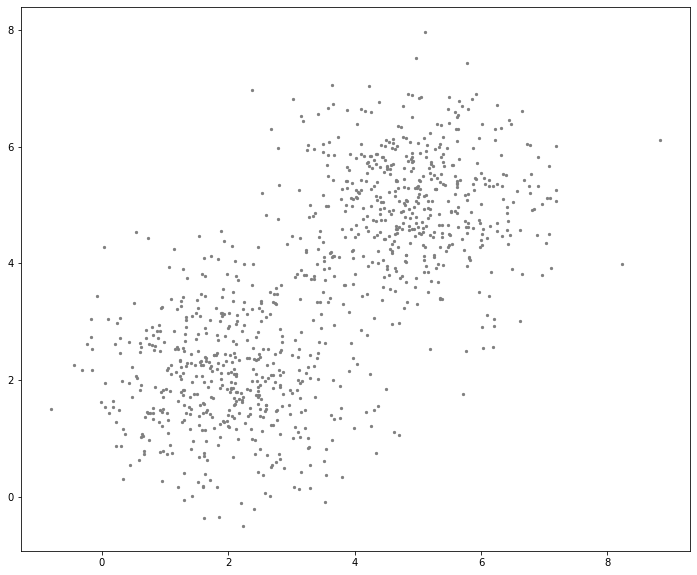

In [2]:
x1 = []
x2 = []
with open("data1.csv", "r") as file:
    for row in file:
        x1.append(row.split(',')[0])
        x2.append(row.split(',')[1])

x1.remove('x1')
x2.remove('x2\n')

for i, (j1, j2) in enumerate(zip(x1, x2)):
    x1[i] = float(j1)
    x2[i] = float(j2)

data = np.transpose(np.array([x1, x2]))

fig = plt.figure()
fig.set_size_inches(12, 10)
plt.scatter(data[:, 0], data[:, 1], s=5, c='grey')
plt.show()

In [3]:
k = 2 # number of clusters
n = data.shape[1] # number of features
m = data.shape[0] # number of data points
clusters = np.zeros(m)
distances = np.zeros((m, k))

myMin = np.min(data, axis=0)
myMax = np.max(data, axis=0)
centroids = np.random.rand(k, n) * (myMax - myMin) + myMin
last_centroids = np.zeros(centroids.shape)


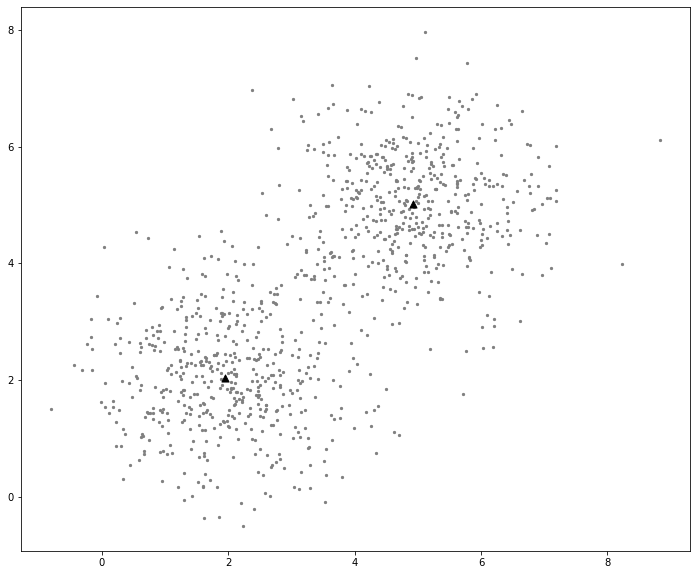

In [4]:
error = np.sum(centroids - last_centroids)

while error != 0:
    distances[:, 0] = np.linalg.norm(data - centroids[0], axis=1)
    distances[:, 1] = np.linalg.norm(data - centroids[1], axis=1)
    for i, (d1, d2) in enumerate(zip(distances[:, 0], distances[:, 1])):
        clusters[i] = ((d1 / (d1 + d2)) < (d2 / (d1 + d2)))
    last_centroids = copy.deepcopy(centroids)
    centroids[0] = np.mean(data[clusters == 0], axis=0)
    centroids[1] = np.mean(data[clusters == 1], axis=0)
    error = np.sum(centroids - last_centroids)

fig = plt.figure()
fig.set_size_inches(12, 10)
plt.scatter(data[:,0], data[:,1], marker='.', c='grey', s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='black', s=50)
plt.show()


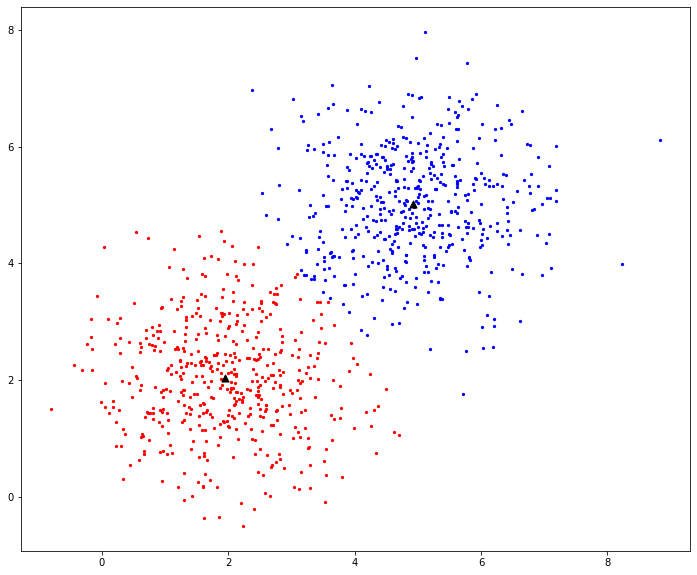

In [5]:
fig = plt.figure()
fig.set_size_inches(12, 10)
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], marker='.', c='r', s=20)
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], marker='.', c='b', s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='black', s=50)
plt.show()